In [328]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing relevant libraries

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the training dataset

In [330]:
X = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI_codes/CAC_vaccine_data/training_set_features.csv')
y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI_codes/CAC_vaccine_data/training_set_labels.csv')

# Description of the dataset

In [331]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [332]:
X.drop(X.columns[0],axis = 1,inplace = True)

In [333]:
X.head(3)

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo


In [334]:
y.head(3)

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0


In [335]:
print(X.shape)
print(y.shape)

(26707, 35)
(26707, 3)


Describing the type of values present in out dataset

In [336]:
#Categorical Value
print(X.describe(include=object))

        age_group         education   race     sex             income_poverty  \
count       26707             25300  26707   26707                      22284   
unique          5                 4      4       2                          3   
top     65+ Years  College Graduate  White  Female  <= $75,000, Above Poverty   
freq         6843             10097  21222   15858                      12777   

       marital_status rent_or_own employment_status hhs_geo_region  \
count           25299       24665             25244          26707   
unique              2           2                 3             10   
top           Married         Own          Employed       lzgpxyit   
freq            13555       18736             13560           4297   

                      census_msa employment_industry employment_occupation  
count                      26707               13377                 13237  
unique                         3                  21                    23  
top     MSA,

In [337]:
#Numeric Value
print(X.describe(include = np.float64))

        xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
count  26615.000000   26591.000000               26636.000000   
mean       1.618486       1.262532                   0.048844   
std        0.910311       0.618149                   0.215545   
min        0.000000       0.000000                   0.000000   
25%        1.000000       1.000000                   0.000000   
50%        2.000000       1.000000                   0.000000   
75%        2.000000       2.000000                   0.000000   
max        3.000000       2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26499.000000          26688.000000           26665.000000   
mean               0.725612              0.068982               0.825614   
std                0.446214              0.253429               0.379448   
min                0.000000              0.000000               0.000000   
25%                0.000000       

Null values per feature

In [338]:
null_values_per_variable = 100 * (X.isnull().sum()/X.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

employment_occupation          50.4
employment_industry            49.9
health_insurance               46.0
income_poverty                 16.6
doctor_recc_xyz                 8.1
doctor_recc_seasonal            8.1
rent_or_own                     7.6
employment_status               5.5
marital_status                  5.3
education                       5.3
chronic_med_condition           3.6
child_under_6_months            3.1
health_worker                   3.0
opinion_seas_sick_from_vacc     2.0
opinion_seas_risk               1.9
opinion_seas_vacc_effective     1.7
opinion_xyz_sick_from_vacc      1.5
opinion_xyz_risk                1.5
opinion_xyz_vacc_effective      1.5
household_children              0.9
household_adults                0.9
behavioral_avoidance            0.8
behavioral_touch_face           0.5
xyz_knowledge                   0.4
behavioral_antiviral_meds       0.3
xyz_concern                     0.3
behavioral_large_gatherings     0.3
behavioral_outside_home     

In [339]:
X = X.astype('object')

Unique Values in each feature

#### Let me try to drop all NA ans check thr number of rows left ->

In [340]:
# df_wonull = X.dropna()
# print(df_wonull.shape)
# print(X.shape)

### So lot of rows are dropped so will not consider this strategy

In [341]:
# Fill null values with the mode (most frequent category) for each column
for column in X.select_dtypes(include=['object']).columns:
    mode_value = X[column].mode()[0]
    X[column].fillna(mode_value, inplace=True)

print("DataFrame after filling with mode:")
print(X)


DataFrame after filling with mode:
       xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0              1.0            0.0                        0.0   
1              3.0            2.0                        0.0   
2              1.0            1.0                        0.0   
3              1.0            1.0                        0.0   
4              2.0            1.0                        0.0   
...            ...            ...                        ...   
26702          2.0            0.0                        0.0   
26703          1.0            2.0                        0.0   
26704          2.0            2.0                        0.0   
26705          1.0            1.0                        0.0   
26706          0.0            0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       0.0                   0.0                    0.0   
1                       1.0                 

In [342]:
#Let's check the null values count now
null_values_per_variable = 100 * (X.isnull().sum()/X.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)


xyz_concern                    0.0
marital_status                 0.0
opinion_seas_sick_from_vacc    0.0
age_group                      0.0
education                      0.0
race                           0.0
sex                            0.0
income_poverty                 0.0
rent_or_own                    0.0
opinion_seas_vacc_effective    0.0
employment_status              0.0
hhs_geo_region                 0.0
census_msa                     0.0
household_adults               0.0
household_children             0.0
employment_industry            0.0
opinion_seas_risk              0.0
opinion_xyz_sick_from_vacc     0.0
xyz_knowledge                  0.0
behavioral_touch_face          0.0
behavioral_antiviral_meds      0.0
behavioral_avoidance           0.0
behavioral_face_mask           0.0
behavioral_wash_hands          0.0
behavioral_large_gatherings    0.0
behavioral_outside_home        0.0
doctor_recc_xyz                0.0
opinion_xyz_risk               0.0
doctor_recc_seasonal

In [343]:
X.shape

(26707, 35)

In [344]:
y.shape

(26707, 3)

In [345]:
X.nunique().sort_values()

child_under_6_months            2
marital_status                  2
rent_or_own                     2
health_insurance                2
health_worker                   2
chronic_med_condition           2
doctor_recc_seasonal            2
doctor_recc_xyz                 2
sex                             2
behavioral_outside_home         2
behavioral_large_gatherings     2
behavioral_wash_hands           2
behavioral_face_mask            2
behavioral_avoidance            2
behavioral_antiviral_meds       2
behavioral_touch_face           2
census_msa                      3
employment_status               3
xyz_knowledge                   3
income_poverty                  3
race                            4
household_children              4
household_adults                4
education                       4
xyz_concern                     4
opinion_xyz_sick_from_vacc      5
opinion_seas_sick_from_vacc     5
opinion_seas_risk               5
opinion_seas_vacc_effective     5
opinion_xyz_ri

In [346]:
unique_counts = X.nunique()

# Identify columns with unique value counts equal to 2
binary_columns = unique_counts[unique_counts == 2].index.tolist()

# Identify columns with unique value counts greater than 2
multi_columns = unique_counts[((unique_counts > 2) & (unique_counts<25))].index.tolist()

# Create the X_binary and X_multi DataFrames
X_binary = X[binary_columns]
X_multi = X[multi_columns]

In [347]:
X_multi = X_multi.astype('object')

In [348]:
X_binary

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,sex,marital_status,rent_or_own
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Female,Not Married,Own
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Male,Not Married,Rent
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Male,Not Married,Own
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,Female,Not Married,Rent
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Female,Married,Own
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Female,Not Married,Own
26703,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,Male,Not Married,Rent
26704,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Female,Not Married,Own
26705,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Female,Married,Rent


In [349]:
# Perform label encoding using pandas
X_binary['sex'] = X_binary['sex'].map({'Male': 0, 'Female': 1})

X_binary['rent_or_own'] = X_binary['rent_or_own'].map({'Own': 1, 'Rent': 0})

<ipython-input-349-213c7df56a8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_binary['sex'] = X_binary['sex'].map({'Male': 0, 'Female': 1})
<ipython-input-349-213c7df56a8c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_binary['rent_or_own'] = X_binary['rent_or_own'].map({'Own': 1, 'Rent': 0})


In [350]:
X_binary['marital_status'] = X_binary['marital_status'].map({'Married': 1, 'Not Married': 0})

<ipython-input-350-f7e51773f0fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_binary['marital_status'] = X_binary['marital_status'].map({'Married': 1, 'Not Married': 0})


In [351]:
X_binary

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,sex,marital_status,rent_or_own
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,1
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1,0,0
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1
26703,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0,0,0
26704,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1
26705,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0


In [352]:
X_multi

,xyz_concern,xyz_knowledge,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,income_poverty,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Below Poverty,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,fcxhlnwr,xtkaffoo
1,3.0,2.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Below Poverty,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,"<= $75,000, Above Poverty",Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Below Poverty,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,fcxhlnwr,xtkaffoo
4,2.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,"<= $75,000, Above Poverty",Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,"<= $75,000, Above Poverty",Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,fcxhlnwr,xtkaffoo
26703,1.0,2.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,"<= $75,000, Above Poverty",Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,2.0,2.0,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,"<= $75,000, Above Poverty",Employed,lzgpxyit,"MSA, Not Principle City",0.0,0.0,fcxhlnwr,xtkaffoo
26705,1.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,"<= $75,000, Above Poverty",Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [353]:
# convert into dummies - one hot encoding
X_multi_dummy = pd.get_dummies(X_multi, drop_first=True)
X_multi_dummy.head()

,xyz_concern_1.0,xyz_concern_2.0,xyz_concern_3.0,xyz_knowledge_1.0,xyz_knowledge_2.0,opinion_xyz_vacc_effective_2.0,opinion_xyz_vacc_effective_3.0,opinion_xyz_vacc_effective_4.0,opinion_xyz_vacc_effective_5.0,opinion_xyz_risk_2.0,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,True,False,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2,True,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,True,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,True,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [354]:
X_dummy = pd.concat([X_binary, X_multi_dummy], axis=1)

In [355]:
X_dummy

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,True,False
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,False,False,False,False,False,False,False,False,True,False
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
26703,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
26704,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
26705,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


Segregating categorical and numerical variables

In [356]:
# cat_cols = X.select_dtypes(include='object').columns
# num_cols = X.select_dtypes(include=np.float64).columns

In [357]:
# cat_cols

In [358]:
# num_cols

Converting all columns to object type

In [359]:
# X.columns

In [360]:
# X = X.astype('object')

In [361]:
# cat_cols = X.select_dtypes(include='object').columns
# num_cols = X.select_dtypes(include=np.float64).columns

#**Data Cleaning**

In [362]:
# removing the columns having more than 90% missing values
# missing_columns = X.columns[100*(X.isnull().sum()/len(X.index)) > 20]
# print(missing_columns)

In [363]:
# X=X.drop(missing_columns,axis=1)

In [364]:
X.shape

(26707, 35)

In [365]:
# summarise number of missing values again
100*(X.isnull().sum()/len(X.index))

xyz_concern                    0.0
xyz_knowledge                  0.0
behavioral_antiviral_meds      0.0
behavioral_avoidance           0.0
behavioral_face_mask           0.0
behavioral_wash_hands          0.0
behavioral_large_gatherings    0.0
behavioral_outside_home        0.0
behavioral_touch_face          0.0
doctor_recc_xyz                0.0
doctor_recc_seasonal           0.0
chronic_med_condition          0.0
child_under_6_months           0.0
health_worker                  0.0
health_insurance               0.0
opinion_xyz_vacc_effective     0.0
opinion_xyz_risk               0.0
opinion_xyz_sick_from_vacc     0.0
opinion_seas_vacc_effective    0.0
opinion_seas_risk              0.0
opinion_seas_sick_from_vacc    0.0
age_group                      0.0
education                      0.0
race                           0.0
sex                            0.0
income_poverty                 0.0
marital_status                 0.0
rent_or_own                    0.0
employment_status   

Finding class count per column

In [366]:
for i in X.columns:
  print(X[i].value_counts())

xyz_concern
2.0    10667
1.0     8153
3.0     4591
0.0     3296
Name: count, dtype: int64
xyz_knowledge
1.0    14714
2.0     9487
0.0     2506
Name: count, dtype: int64
behavioral_antiviral_meds
0.0    25406
1.0     1301
Name: count, dtype: int64
behavioral_avoidance
1.0    19436
0.0     7271
Name: count, dtype: int64
behavioral_face_mask
0.0    24866
1.0     1841
Name: count, dtype: int64
behavioral_wash_hands
1.0    22057
0.0     4650
Name: count, dtype: int64
behavioral_large_gatherings
0.0    17160
1.0     9547
Name: count, dtype: int64
behavioral_outside_home
0.0    17726
1.0     8981
Name: count, dtype: int64
behavioral_touch_face
1.0    18129
0.0     8578
Name: count, dtype: int64
doctor_recc_xyz
0.0    21299
1.0     5408
Name: count, dtype: int64
doctor_recc_seasonal
0.0    18613
1.0     8094
Name: count, dtype: int64
chronic_med_condition
0.0    19417
1.0     7290
Name: count, dtype: int64
child_under_6_months
0.0    24569
1.0     2138
Name: count, dtype: int64
health_worker
0

In [367]:
# summarise number of missing values again
print(X.shape)
# null_values_per_variable = 100 * (X.isnull().sum()/X.shape[0]).round(3)#.reset_index()
null_values_per_variable = X.isnull().sum()
# null_values_per_variable.sum()
null_values_per_variable.sort_values(ascending=False)

(26707, 35)


xyz_concern                    0
marital_status                 0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
rent_or_own                    0
opinion_seas_vacc_effective    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
employment_industry            0
opinion_seas_risk              0
opinion_xyz_sick_from_vacc     0
xyz_knowledge                  0
behavioral_touch_face          0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
doctor_recc_xyz                0
opinion_xyz_risk               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_unde

Encoding categorical variables

In [368]:
# convert into dummies - one hot encoding
# X_dummies = pd.get_dummies(X, drop_first=True)
# X_dummies.head()

In [369]:
# drop categorical variables
# X = X.drop(list(X.columns), axis=1)

In [370]:
# concat dummy variables with X
# X = pd.concat([X, X_dummies], axis=1)

# Converting y label to contain only single target variable

In [371]:
def assign_class(row):
    if row['xyz_vaccine'] == 0 and row['seasonal_vaccine'] == 0:
        return 0
    elif row['xyz_vaccine'] == 0 and row['seasonal_vaccine'] == 1:
        return 1
    elif row['xyz_vaccine'] == 1 and row['seasonal_vaccine'] == 0:
        return 2
    elif row['xyz_vaccine'] == 1 and row['seasonal_vaccine'] == 1:
        return 3

y_new = y.apply(assign_class, axis=1)

In [372]:
# y_new = y_new.astype('object')
type(y_new)

pandas.core.series.Series

In [373]:
# X.columns

In [374]:
# y_new_dummies = pd.get_dummies(y_new, drop_first=False)
# y_new = y_new.to_frame()
# y_new = y_new.drop(list(y_new.columns), axis=1)
# y_new = pd.concat([y_new, y_new_dummies], axis=1)
# y_new.head(5)

#Training logistic regression model

In [375]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [376]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y_new, test_size=0.2, random_state=42)

In [377]:
print((X_train.head(1)))

       behavioral_antiviral_meds  behavioral_avoidance  behavioral_face_mask  \
24706                        0.0                   1.0                   0.0   

       behavioral_wash_hands  behavioral_large_gatherings  \
24706                    1.0                          0.0   

       behavioral_outside_home  behavioral_touch_face  doctor_recc_xyz  \
24706                      1.0                    1.0              0.0   

       doctor_recc_seasonal  chronic_med_condition  ...  \
24706                   0.0                    1.0  ...   

       employment_occupation_qxajmpny  employment_occupation_rcertsgn  \
24706                           False                           False   

       employment_occupation_tfqavkke  employment_occupation_ukymxvdu  \
24706                           False                           False   

       employment_occupation_uqqtjvyb  employment_occupation_vlluhbov  \
24706                           False                           False   

       

In [378]:
print((y_train.head(10)))

24706    0
5393     1
20898    3
3429     0
8731     0
24865    2
19712    0
15333    0
5449     0
11187    0
dtype: int64


In [379]:
# X_train_no_id = X_train.drop('respondent_id', axis=1)

In [380]:
# X_train_no_id

In [381]:
# Initialize the Logistic Regression model with multinomial option for multi-class classification
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [382]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have already fitted your logistic regression model
# model.fit(X_train, y_train)

# Predict using the fitted model
y_pred = model.predict(X_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average=None)
recall = recall_score(y_test, y_pred,average=None)
f1 = f1_score(y_test, y_pred,average=None)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.6873830026207413
Precision: [0.73216561 0.63490909 0.61290323 0.60427136]
Recall: [0.85623836 0.57170923 0.09223301 0.52056277]
F1 Score: [0.78935622 0.60165403 0.16033755 0.55930233]
Confusion Matrix:
[[2299  282    8   96]
 [ 478  873    2  174]
 [ 127   15   19   45]
 [ 236  205    2  481]]


In [383]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79      2685
           1       0.63      0.57      0.60      1527
           2       0.61      0.09      0.16       206
           3       0.60      0.52      0.56       924

    accuracy                           0.69      5342
   macro avg       0.65      0.51      0.53      5342
weighted avg       0.68      0.69      0.67      5342



## Refer here for Target classes


**no vaccine -> 0**

**seasonal_vaccine -> 1**

**xyz_vaccine -> 2**

**Both vaccines -> 3**

In [384]:
X_dummy.shape

(26707, 118)

# Predict probabilities for the test data

In [385]:
# Predict probabilities for the test data
y_pred_proba = model.predict_proba(X_test)


In [386]:
y_pred_proba[1]

array([0.72040094, 0.17252957, 0.06959577, 0.03747372])

In [387]:
y_pred[1]

0

In [388]:
y_pred_proba

array([[0.6915902 , 0.21294381, 0.03748914, 0.05797686],
       [0.72040094, 0.17252957, 0.06959577, 0.03747372],
       [0.11844686, 0.84873022, 0.00144786, 0.03137506],
       ...,
       [0.25151572, 0.11053825, 0.29444402, 0.34350201],
       [0.4035583 , 0.53166255, 0.01444382, 0.05033533],
       [0.19980529, 0.76559965, 0.00258973, 0.03200533]])

In [389]:
len(model.classes_)

4

In [390]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
from typing import Tuple, List

In [391]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the target variable
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_bin.shape[1]

# Assuming your logistic regression model is already trained and stored in 'model'

# Predict probabilities for the test data
y_pred_proba = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

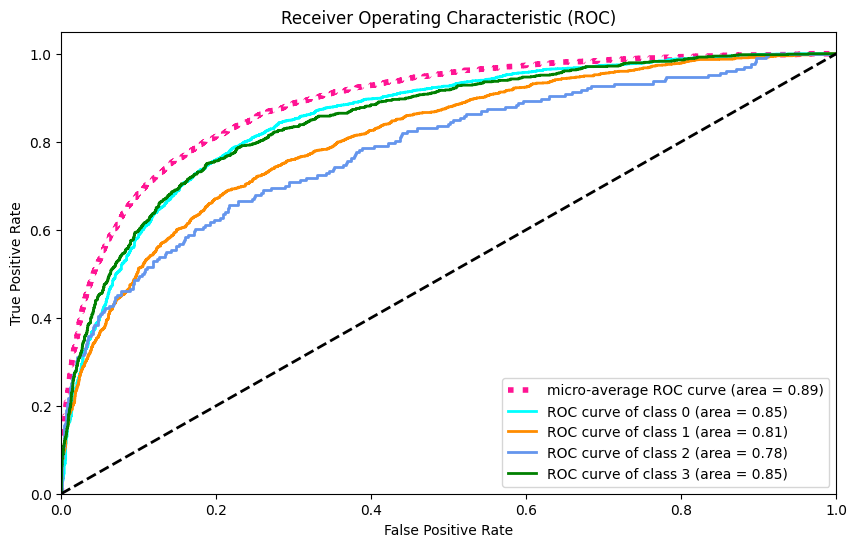

AUC for each class:
Class 0: 0.85
Class 1: 0.81
Class 2: 0.78
Class 3: 0.85
Micro-average AUC: 0.89


In [392]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Print AUC for each class
print("AUC for each class:")
for i in range(n_classes):
    print(f"Class {i}: {roc_auc[i]:.2f}")

# Print micro-average AUC
print(f"Micro-average AUC: {roc_auc['micro']:.2f}")


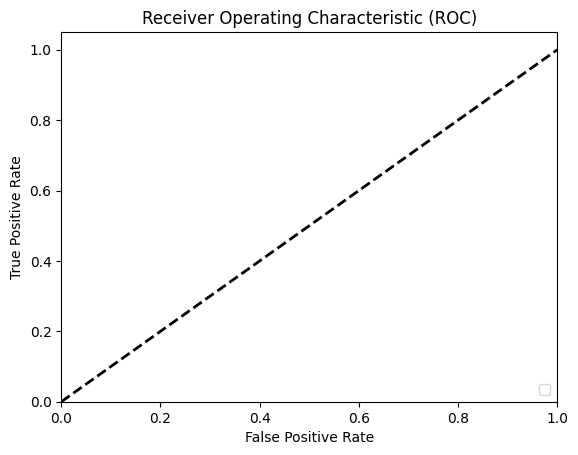

AUC for each class:
Class 0: 0.85
Class 1: 0.81
Class 2: 0.78
Class 3: 0.85
Micro-average AUC: 0.89


In [393]:
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Print AUC for each class
print("AUC for each class:")
for i in range(n_classes):

    print(f"Class {i}: {roc_auc[i]:.2f}")

# Print micro-average AUC
print(f"Micro-average AUC: {roc_auc['micro']:.2f}")

**Test Data**

In [424]:
df_test_set_features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI_codes/CAC_vaccine_data/test_set_features.csv')


In [415]:
df_test_set_features.shape

(26708, 35)

In [395]:
df_test_set_features.head(5)

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [396]:
# Set the 'Name' column as the index
df_test_set_features.set_index('respondent_id', inplace=True)

In [397]:
df_test_set_features.head(5)

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [398]:
df_test_set_features = df_test_set_features.astype('object')

In [399]:
# Fill null values with the mode (most frequent category) for each column
for column in df_test_set_features.select_dtypes(include=['object']).columns:
    mode_value = df_test_set_features[column].mode()[0]
    df_test_set_features[column].fillna(mode_value, inplace=True)

print("DataFrame after filling with mode:")
print(df_test_set_features)

DataFrame after filling with mode:
               xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
respondent_id                                                          
26707                  2.0            2.0                        0.0   
26708                  1.0            1.0                        0.0   
26709                  2.0            2.0                        0.0   
26710                  1.0            1.0                        0.0   
26711                  3.0            1.0                        1.0   
...                    ...            ...                        ...   
53410                  1.0            1.0                        0.0   
53411                  3.0            1.0                        0.0   
53412                  0.0            1.0                        0.0   
53413                  3.0            1.0                        0.0   
53414                  2.0            1.0                        0.0   

               behavioral_av

In [400]:
unique_counts = df_test_set_features.nunique()

# Identify columns with unique value counts equal to 2
binary_columns = unique_counts[unique_counts == 2].index.tolist()

# Identify columns with unique value counts greater than 2
multi_columns = unique_counts[((unique_counts > 2) & (unique_counts<25))].index.tolist()

# Create the X_binary and X_multi DataFrames
df_binary = df_test_set_features[binary_columns]
df_multi = df_test_set_features[multi_columns]

In [401]:
df_multi = df_multi.astype('object')

In [402]:
df_binary

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,sex,marital_status,rent_or_own
respondent_id,,,,,,,,,,,,,,,,
26707,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Female,Not Married,Rent
26708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Male,Not Married,Rent
26709,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Male,Married,Own
26710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,Female,Married,Own
26711,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,Female,Not Married,Own
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53410,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,Female,Married,Own
53411,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Male,Married,Rent
53412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Female,Not Married,Rent


In [403]:
# Perform label encoding using pandas
df_binary['sex'] = df_binary['sex'].map({'Male': 0, 'Female': 1})
df_binary['marital_status'] = df_binary['marital_status'].map({'Married': 1, 'Not Married': 0})
df_binary['rent_or_own'] = df_binary['rent_or_own'].map({'Own': 1, 'Rent': 0})

<ipython-input-403-b2839d27926d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary['sex'] = df_binary['sex'].map({'Male': 0, 'Female': 1})
<ipython-input-403-b2839d27926d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary['marital_status'] = df_binary['marital_status'].map({'Married': 1, 'Not Married': 0})
<ipython-input-403-b2839d27926d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [404]:
df_binary

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,sex,marital_status,rent_or_own
respondent_id,,,,,,,,,,,,,,,,
26707,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0
26708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
26709,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1
26710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1,1,1
26711,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53410,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1,1,1
53411,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0
53412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0


In [405]:
df_multi

,xyz_concern,xyz_knowledge,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,income_poverty,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,"> $75,000",Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Below Poverty,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
26709,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,"> $75,000",Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
26710,1.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,"<= $75,000, Above Poverty",Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,xtkaffoo
26711,3.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,"<= $75,000, Above Poverty",Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53410,1.0,1.0,4.0,2.0,2.0,4.0,2.0,1.0,35 - 44 Years,College Graduate,White,"<= $75,000, Above Poverty",Employed,dqpwygqj,"MSA, Principle City",1.0,1.0,fcxhlnwr,xtkaffoo
53411,3.0,1.0,4.0,1.0,1.0,5.0,2.0,2.0,18 - 34 Years,12 Years,White,Below Poverty,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
53412,0.0,1.0,4.0,3.0,1.0,4.0,3.0,1.0,18 - 34 Years,Some College,White,Below Poverty,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,xtkaffoo


In [406]:
# convert into dummies - one hot encoding
df_multi_dummy = pd.get_dummies(df_multi, drop_first=True)
df_multi_dummy.head()

,xyz_concern_1.0,xyz_concern_2.0,xyz_concern_3.0,xyz_knowledge_1.0,xyz_knowledge_2.0,opinion_xyz_vacc_effective_2.0,opinion_xyz_vacc_effective_3.0,opinion_xyz_vacc_effective_4.0,opinion_xyz_vacc_effective_5.0,opinion_xyz_risk_2.0,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,False,True,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
26708,True,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
26709,False,True,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
26710,True,False,False,True,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
26711,False,False,True,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [407]:
df_dummy = pd.concat([df_binary, df_multi_dummy], axis=1)

In [408]:
df_dummy

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
26708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
26709,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
26710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,True,False
26711,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53410,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,True,False
53411,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False
53412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False


In [409]:
y_test_pred = model.predict(df_dummy)

In [410]:
print(y_test_pred)

[0 0 3 ... 0 0 3]


In [411]:
# Predict probabilities for the test data
y_test_pred_proba = model.predict_proba(df_dummy)

In [412]:
y_test_pred_proba

array([[0.67111624, 0.27487   , 0.01472002, 0.03929374],
       [0.93525463, 0.02652548, 0.03177824, 0.00644165],
       [0.30946943, 0.29764694, 0.04162033, 0.3512633 ],
       ...,
       [0.76501229, 0.11624836, 0.01961907, 0.09912028],
       [0.68446591, 0.25276809, 0.01609884, 0.04666715],
       [0.32383223, 0.15321951, 0.17421114, 0.34873712]])

In [413]:
# Convert the array to a DataFrame
y_test_final = pd.DataFrame(y_test_pred_proba, columns=['None_vac', 'seasonal_vaccine', 'h1n1_vaccine', 'Both'])

In [414]:
y_test_final

,None_vac,seasonal_vaccine,h1n1_vaccine,Both
0,0.671116,0.274870,0.014720,0.039294
1,0.935255,0.026525,0.031778,0.006442
2,0.309469,0.297647,0.041620,0.351263
3,0.140165,0.397550,0.028266,0.434020
4,0.536425,0.228547,0.147227,0.087801
...,...,...,...,...
26703,0.444760,0.226635,0.054785,0.273820
26704,0.703996,0.208517,0.023213,0.064274
26705,0.765012,0.116248,0.019619,0.099120
26706,0.684466,0.252768,0.016099,0.046667


In [416]:
df_dummy.head(10)

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
26708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
26709,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
26710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,True,False
26711,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
26712,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
26713,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,True,False
26714,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
26715,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False


In [425]:
df_test_set_features.head(5)

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [426]:
df_result = pd.concat([df_test_set_features, y_test_final], axis=1)

In [428]:
df_result

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,None_vac,seasonal_vaccine,h1n1_vaccine,Both
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi,0.671116,0.274870,0.014720,0.039294
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp,0.935255,0.026525,0.031778,0.006442
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik,0.309469,0.297647,0.041620,0.351263
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN,0.140165,0.397550,0.028266,0.434020
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird,0.536425,0.228547,0.147227,0.087801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN,0.444760,0.226635,0.054785,0.273820
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov,0.703996,0.208517,0.023213,0.064274
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN,0.765012,0.116248,0.019619,0.099120
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN,0.684466,0.252768,0.016099,0.046667


In [430]:
df_result.shape

(26708, 40)

In [431]:
df_final_result = df_result[['respondent_id','h1n1_vaccine','seasonal_vaccine']]

In [432]:
df_final_result

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.014720,0.274870
1,26708,0.031778,0.026525
2,26709,0.041620,0.297647
3,26710,0.028266,0.397550
4,26711,0.147227,0.228547
...,...,...,...
26703,53410,0.054785,0.226635
26704,53411,0.023213,0.208517
26705,53412,0.019619,0.116248
26706,53413,0.016099,0.252768


In [434]:
# Convert DataFrame to CSV file
df_final_result.to_csv('/content/drive/MyDrive/Colab Notebooks/AI_codes/submission_mir.csv', index=False)

# Print a message to indicate that the file has been saved
print("DataFrame has been saved to 'output.csv'.")

DataFrame has been saved to 'output.csv'.
